$$ \vec{\beta} = (X^TX)^{-1}X^T\vec{y}$$

X = matriks Vandermonde \
$\vec{y}$ = Matriks daerah hasil (range)

# 1. Mencari nilai X

In [34]:
import numpy as np

dataX = [i for i in range(1,7)]
dataY = [1.8,3.5,4.2,4.9,5.3,6,6.8,6.5,6.4,6.9]

x = []
n = int(input("Masukkan jumlah orde: "))
xSeparation = []

for i in range(len(dataX)):
    pangkat = 0 
    for j in range(n+1):
        elementX = dataX[i]**pangkat
        pangkat += 1 
        xSeparation.append(elementX)
    x.append(xSeparation)
    xSeparation = [] # memisahkan setiap baris
print(x)

[[1, 1, 1], [1, 2, 4], [1, 3, 9], [1, 4, 16], [1, 5, 25], [1, 6, 36]]


# 2. Melakukan Transpose matriks X

In [36]:
import numpy as np

x = np.array([[1, 1, 1], [1, 2, 4], [1, 3, 9], [1, 4, 16], [1, 5, 25], [1, 6, 36]]
)

def transposeMatrix(x):
    xT = []
    for j in range(len(x[0])):
        cols = []
        for i in range(len(x)):
            cols.append(x[i][j])
        xT.append(cols)
    return xT

xTranspose = transposeMatrix(x)
print(xTranspose)

[[1, 1, 1, 1, 1, 1], [1, 2, 3, 4, 5, 6], [1, 4, 9, 16, 25, 36]]


# 3. Hitung $$M = (X^TX)$$

In [43]:
import numpy as np

xT = np.array([[1, 1, 1, 1, 1, 1], [1, 2, 3, 4, 5, 6], [1, 4, 9, 16, 25, 36]])
x = np.array([[1, 1, 1], [1, 2, 4], [1, 3, 9], [1, 4, 16], [1, 5, 25], [1, 6, 36]])

def multiplyMatrixs(x1,x2):
    m = []
    for i in range(len(x1)):
        row = []
        for j in range(len(x2[0])):
            sum = 0 
            for k in range(len(x1[0])):
                sum += x1[i][k] * x2[k][j]
            row.append(sum)
        m.append(row)    
    return m
multiplyM = multiplyMatrixs(xT,x)
print(f"Matriks M = {multiplyM}")

Matriks M = [[6, 21, 91], [21, 91, 441], [91, 441, 2275]]


# 4. Hitung invers M $$M^{-1}$$ Gunakan LU-Decomposition

In [49]:
import numpy as np

m = np.array([[6, 21, 91], [21, 91, 441], [91, 441, 2275]],float)

y = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]],float)


def LUCrout():
    L = np.array([
        [0.0,0.0,0.0],[0.0,0.0,0.0],[0.0,0.0,0.0]
        ],float)

    U = np.array([
        [0.0,0.0,0.0],[0.0,0.0,0.0],[0.0,0.0,0.0]
        ],float)
    beta = np.array([[0.0,0.0,0.0],[0.0,0.0,0.0],[0.0,0.0,0.0]],float)
    
    
    # Start
    for i in range(len(L)):
        L[i][0]= m[i][0] #2
        for j in range(0,len(m)):
            if i==j: #3
                U[i][j] = 1.0
            else:
                U[0][j] = m[0][j]/L[0][0] #4
    
    for j in range(1,len(L)): #5
        for i in range(j,len(m)):
            LUforLower = 0.0
            for k in range(0,j):
                LUforLower += L[i][k]*U[k][j]
            L[i][j] = m[i][j] - LUforLower
            
        for k in range(j,len(m)):
            LUforUpper = 0.0
            for i in range(0,j):
                LUforUpper += L[j][i]*U[i][k]
            U[j][k] = (m[j][k] - LUforUpper)/L[j][j]
    for n in range(len(m)):
        sumofLU = 0.0
        for k in range(0,n): # batas n-1 awalnya kemudian upper tidak sempurna perhitungannya
            sumofLU += L[n][k]*U[k][n]
        L[n][n] = m[n][n] - sumofLU
        
    for i in range(0,len(beta)):
        sumOFLD = 0.0
        for j in range(0,i):
            sumOFLD += L[i][j]*beta[j]

        beta[i] = (y[i] - sumOFLD)/L[i][i]
        
    print(f"Matriks Lower = \n{L}")
    print(f"Matriks Upper = \n{U}")
    print(f"Matriks D = \n{beta}")
    
    
LUCrout()

Matriks Lower = 
[[  6.           0.           0.        ]
 [ 21.          17.5          0.        ]
 [ 91.         122.5         37.33333333]]
Matriks Upper = 
[[ 1.          3.5        15.16666667]
 [ 0.          1.          7.        ]
 [ 0.          0.          1.        ]]
Matriks D = 
[[ 0.16666667  0.          0.        ]
 [-0.2         0.05714286  0.        ]
 [ 0.25       -0.1875      0.02678571]]


# Sulih Mundur - Backward Substitution

In [115]:
b = np.array([[1,3.5,15.17],
            [0,1,7],
            [0,0,1]],float)

a = np.array([[0.1667,0,0],
            [-0.2,0.0571,0],
            [0.25,-0.1875,0.0268]],float)
def backwardSubs(u,d):
    inversM = np.array([[0,0,0],
                        [0,0,0],
                        [0,0,0]],float)
    n = len(inversM)
    for i in range(n-1,-1,-1):
        sumUpper = 0.0
        for j in range(i+1,n):
            sumUpper += u[i][j]*inversM[j]

        inversM[i] = (d[i] - sumUpper)/u[i][i]
    print(inversM)
backwardSubs(b,a)


[[ 3.1992   -1.949225  0.250044]
 [-1.95      1.3696   -0.1876  ]
 [ 0.25     -0.1875    0.0268  ]]


# Paramater yang telah didapat  = $M^{-1}; X^T$ 

$$ \vec{\beta} = (X^TX)^{-1}X^T\vec{y}$$

# Mencari nilai koefisien $\vec{\beta}$ 

In [132]:
inversM = np.array([[3.1992,-1.949225,0.250044],
                    [-1.95,1.3696,-0.1875],
                    [0.25,-0.1875,0.0268]],float)
xTranspose = np.array([[1, 1, 1, 1, 1, 1], [1, 2, 3, 4, 5, 6], [1, 4, 9, 16, 25, 36]],float)
dataY = np.array([[1],[4],[10],[15],[26],[35]],float)
# M^-1 * x^t = initBeta
initBeta = inversM@xTranspose@dataY

print(initBeta)

[[-0.233267]
 [ 0.6169  ]
 [ 0.9251  ]]


# plotting grafik dan penetuan persamaan

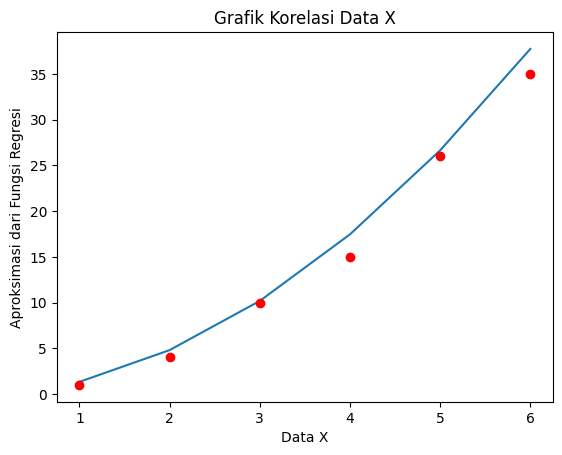

In [221]:
import matplotlib.pyplot as plt
from matplotlib.text import Text
fx = lambda x: -0.233267+0.6169*x+0.9521**x^2
dataX = [x for x in range(1,7)]
approxDataY = [-0.233267+0.6169*x+0.9521*x**2 for x in dataX]

plt.plot(dataX,approxDataY)
plt.plot(dataX,dataY,"ro")
plt.title("Grafik Korelasi Data X")
plt.xlabel("Data X")
plt.ylabel("Aproksimasi dari Fungsi Regresi")
plt.show()

# Menghitung koefiesien relasi $R = \frac{\sum(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum(x_i - \bar{x})^2 (y_i - \bar{y})^2}}$

In [168]:
dataX = np.array([1.0,2.0,3.0,4.0,5.0,6.0])
dataY = np.array([1,4.0,10.0,15.0,26.0,35.0])

xBar = 3.5
yBar = 15.16666667
approxDataY = np.array([-0.233267+0.6169*x+0.9521*x**2 for x in dataX])
approxDataYValues = [1.335733, 4.808933,10.186333,17.467933,26.653733,37.743733]

r = np.sum((dataX - xBar)*(dataY - yBar))/np.sqrt(np.sum((dataX - xBar)**2)*(np.sum((dataY - yBar)**2)))

print(f"Nilai koefisien relasi data = {r}")

Nilai koefisien relasi data = 0.980628622556933


[[1, 1, 1], [1, 2, 4], [1, 3, 9], [1, 4, 16], [1, 5, 25], [1, 6, 36], [1, 7, 49], [1, 8, 64], [1, 9, 81], [1, 10, 100]]
[ 0.84333333  1.30136364 -0.0719697 ]


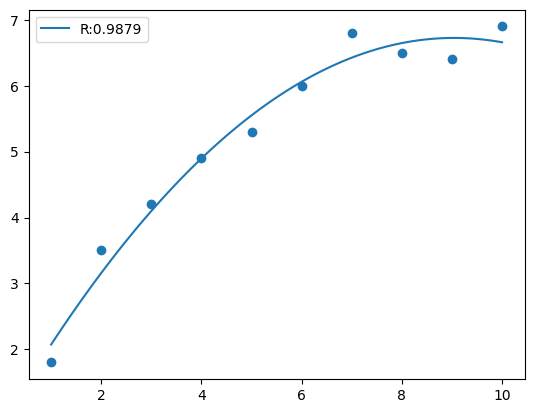

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x=[1,2,3,4,5,6,7,8,9,10]
y=[1.8 ,3.5 ,4.2 ,4.9 ,5.3 ,6 ,6.8 ,6.5 ,6.4 ,6.9 ]
vander=[]
n = int(input("Masukkan jumlah orde: "))
x_ =[]
iterasi = 0 
for i in range(len(x)):
    pangkat = 0 
    for j in range(n+1):
        hasil = x[i]**pangkat
        pangkat += 1
        x_.append(hasil)
    vander.append(x_)
    x_ = []
print(vander)

X = np.array(vander)
Xt=np.transpose(X)
M = np.dot(Xt,X)
M1 = np.linalg.inv(M)
Yt = np.transpose(y)
beta = np.dot(np.dot(M1,Xt),Yt)
print(beta)

x1 = np.arange(min(x),max(x)+ 0.1,0.1)
y1 = []
hasil = 0
for i in range (len(x1)):
    pangkat = 0
    for j in range (n+1):
        hasil += beta[j]*x1[i]**pangkat
        pangkat += 1
    y1.append(hasil)
    hasil = 0

y2 = []
jumlah=0
for i in range (len(x)):
    pangkat = 0 
    for j in range(n+1):
        jumlah += beta[j]*x[i]**pangkat
        pangkat +=1
    y2.append(jumlah)
    jumlah = 0

D2 = 0 
Dt = 0 
y_bar = 0

for i in range(len(y)):
    y_bar += y[i]
y_bar = y_bar/len(y)
for i in range(len(x)):
    D2 += (y[i]-y2[i])**2
    Dt += (y[i]-y_bar)**2
R = ( (Dt-D2) / Dt )**0.5

plt.scatter(x,y)
plt.plot(x1,y1, label="R:%.4f" %R)
plt.legend()
plt.show()

# Pembuktian LU = M

In [ ]:
import numpy as np

M = np.array([[6,21,91]
            ,[21,91,441],
            [91,441,2235]], float)